In [ ]:
import csv
import urllib.request

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf

# URL of the UCI Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Open the URL and read the data
response = urllib.request.urlopen(url)
csvreader = csv.reader(response.read().decode('utf-8').splitlines())

data = [list(map(float, row)) for row in csvreader]

cols = ['class_label', 'alcohol', 'malic_acid', 'ash',
          'alcalinity_of_ash', 'magnesium', 'total_pphenols',
          'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
          'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines',
          'proline']


In [ ]:
from collections import Counter


Counter([x[0] for x in data])

Counter({1.0: 59, 2.0: 71, 3.0: 48})

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


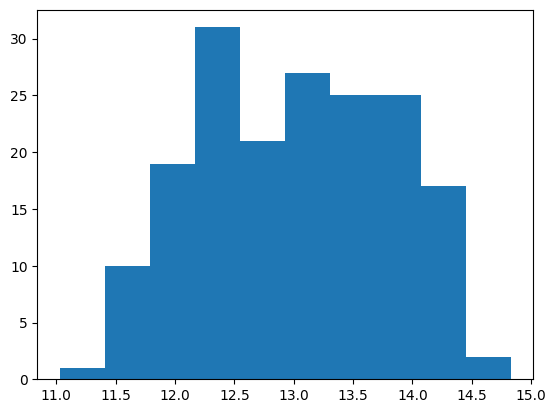

In [ ]:
y = [x[0]-1 for x in data]
#y_bin = [0 if x ==1 else 1 for x in data]
X = [x[1:] for x in data]

#binary
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
import matplotlib.pyplot as plt
plt.hist([x[0] for x in X])
plt.show()

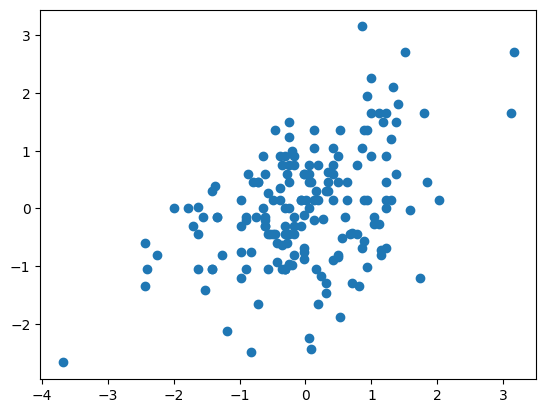

In [ ]:
plt.scatter([x[2] for x in X_scaled],[x[3] for x in X_scaled])
plt.show()

In [ ]:

y = [x[0]-1 for x in data]
y_bin = [0 if x ==1 else 1 for x in data]
X = [x[1:] for x in data]

#binary
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3)

# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tf, y_train_tf, epochs=200, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tf, y_test_tf, verbose=0)
accuracy




1.0

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


# One-hot encode the labels for multi-class classification
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Multi-class logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax', input_shape=(X_train.shape[1],))
    ])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(accuracy)

0.9259259104728699


In [ ]:
model.predict(X_test[2:3])

1/1 [==============================] - 0s 72ms/step


array([[0.75013906, 0.23599023, 0.01387064]], dtype=float32)

In [ ]:
y_test_encoded[2]

array([1., 0., 0.], dtype=float32)

In [ ]:
# now with NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(accuracy)

0.9444444179534912


In [ ]:
# Remember

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test,y_test)

0.9629629629629629

In [ ]:
clf.predict_proba(X_test[0:1])


array([[0.98, 0.02, 0.  ]])

(array([3., 1., 3., 0., 1., 0., 0., 1., 2., 2.]),
 array([0.0057144 , 0.02139803, 0.03708166, 0.05276529, 0.06844892,
        0.08413255, 0.09981619, 0.11549982, 0.13118345, 0.14686708,
        0.16255071]),
 <BarContainer object of 10 artists>)

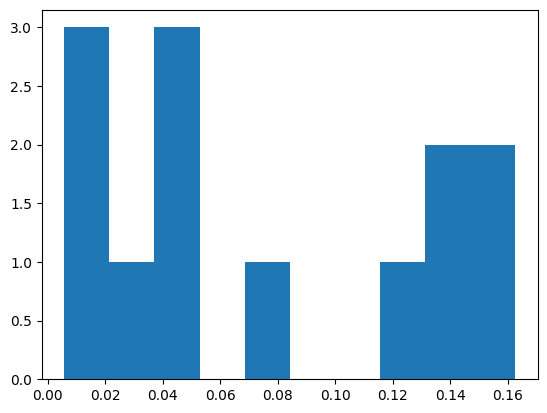

In [ ]:
plt.hist(clf.feature_importances_)

In [ ]:
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence

# Load the dataset
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences
max_words = 500
X_train2 = sequence.pad_sequences(X_train, maxlen=max_words)
X_test2 = sequence.pad_sequences(X_test, maxlen=max_words)

# Convert the sequences to a bag-of-words model
import numpy as np

def vectorize_sequences(sequences, dimension=top_words):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # set specific indices of results[i] to 1s
    return results

X_train3 = vectorize_sequences(X_train2, dimension=top_words)
X_test3 = vectorize_sequences(X_test2, dimension=top_words)

# Build the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(top_words,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               2560256   
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2593281 (9.89 MB)
Trainable params: 2593281 (9.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train[0]
np.where(X_train2[0])


(array([282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
        295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
        308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
        321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
        334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
        347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
        360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
        373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
        386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
        399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
        425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
        438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
        451, 452, 453, 454, 455, 456, 457, 458, 459